<b><font size=8, color='black'>Topographical and Locational Influence on Current and Future Strength of Urban Heat Islands

Carolyn Bean

December 13, 2023

This project will investigate UHI evolution over 14 years of a climate model run, as well as rough elevational impacts on UHI and land surface temperatures. We will use 3 datasets:

1. For visualization purposes, ensemble mean data from CESM1.1.2 HIRES climate simulations, [retrieved from the IBS Ultra-high-resolution climate simulation project](https://ibsclimate.org/research/ultra-high-resolution-climate-simulation-project/). The data was imported from [the CESM HIRES dataset through an OPenDAP server](https://climatedata.ibs.re.kr/data/cesm-hires) and was subject to the limitations of available data (what was and was not prepared to be released in publicly-studiable format). Three sets of model runs are used: a projection using doubled CO2 concentrations, a projection using quadrupled CO2 concentrations, and a projection using present-day CO2 concentrations. To quote the IBS description, "the present-day run was started from a previous high-resolution simulation of Small et al. (2014) and we conducted a 140-year-long control simulation. The doubling and quadrupling CO2 forcing experiments were branched from year 71 of the present-day control run and were integrated for 100 years." ALl In order to effectively isolate urban heat islands, the highest resolution available from the dataset was used (0.25x0.25); it is an imperfect isolation method but for visual observations will serve well enough. I pulled just the temperature variable, in the interests of keeping data at a manageable run time. 

2. For more statistical analyses, we will use a dataset generated by an algorithm developed by [Tirthankar Chakraborty](https://www.pnnl.gov/people/tirthankar-chakraborty-tc), who was a PhD student at Yale at the time of development [(Chakraborty et al., 2018)](https://www.sciencedirect.com/science/article/abs/pii/S0924271620302082). The dataset can be accessed [here](https://data.mendeley.com/datasets/x9mv4krnm2/2) and visualized on Google Earth Engine [here](https://yceo.users.earthengine.app/view/uhimap). The Google Earth Engine also allows for specific locational data to be pulled, which I will do at the end of the notebook.

3. We will also use a 0.25x0.25 elevation dataset from TBASE at NCAR, sourced from a [University of Washington page](http://research.jisao.washington.edu/data_sets/elevation/).

We will first load our necessary packages: 

In [37]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.colors as mplc
import pandas as pd
import scipy.stats as stat
import matplotlib.cm as cm

<b><font size=6, color='blue'>Section 1: Visual Analysis of Trends in CESM-HIRES

Let's read in our data and start examining it. We'll read it in from the public OPenDAP server CESM provides: 

In [221]:
t2 = xr.open_dataset("http://climatedata.ibs.re.kr:9090/dods/public-data/cesm-hires/atm/TS/cesm-hires-day-2xco2-atm-0.25x0.25-TS")
t4 = xr.open_dataset("http://climatedata.ibs.re.kr:9090/dods/public-data/cesm-hires/atm/TS/cesm-hires-day-4xco2-atm-0.25x0.25-TS")
tday = xr.open_dataset("http://climatedata.ibs.re.kr:9090/dods/public-data/cesm-hires/atm/TS/cesm-hires-day-pd-atm-0.25x0.25-TS")

/opt/conda/envs/uwb-fall-2023/lib/python3.8/site-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/opt/conda/envs/uwb-fall-2023/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/opt/conda/envs/uwb-fall-2023/lib/python3.8/site-packages/numpy/core/_asarray.py:83: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects ins

In [39]:
elv = xr.open_dataset('elev.0.25-deg.nc')
elv =elv.reindex(lat=list(reversed(elv.lat)))

/opt/conda/envs/uwb-fall-2023/lib/python3.8/site-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 0:0:0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 0:0:0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


We will first filter the (massive) dataset to include only the geographical bounds of the continental United States and to include one time stamp per year. This is both to reduce the sheer volume of data and to make it easier to be confident that all comparisons and analyses are performed with an accurate understanding of the season - because the time is represented in (daily) steps from time of model origin, I want to remove the potential for error in determining when x amount of days from date of initialization actually falls in the year. So all of our analyses will be looking at winter time UHI - January 1st, to be specific. 

In [337]:
vars = [t2, t4, tday] 

for i in range(len(vars)): ##slicing out our first time stamp and the continental United States
     vars[i] = vars[i].sel(lat = slice(20,53), lon = slice(230,295)).isel(time = slice(0, 10949, 365))

elev = elv.sel(lat = slice (20,53), lon = slice(230, 295)).isel(time = 0) #slicing to just be continental US

In [225]:
temp2 = vars[0]
temp4 = vars[1]
tempday = vars[2]

Let's check out a specific variable - we'll check out the temperature values from the doubled CO2 run.

In [226]:
temp2

<xarray.Dataset>
Dimensions:  (time: 30, lat: 133, lon: 261)
Coordinates:
  * time     (time) object 0141-01-01 12:00:00 ... 0170-01-01 12:00:00
  * lat      (lat) float64 20.0 20.25 20.5 20.75 21.0 ... 52.25 52.5 52.75 53.0
  * lon      (lon) float64 230.0 230.2 230.5 230.8 ... 294.2 294.5 294.8 295.0
Data variables:
    ts       (time, lat, lon) float32 ...
Attributes:
    title:          CESM_hires_day_2xCO2_atm_0.25x0.25_TS
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://www.climatedata.ibs.re.kr/data/cesm-hires
    history:        Tue Apr 11 15:35:55 KST 2023 : imported by GrADS Data Ser...

I've picked a few cities to look at, so we'll plot them here on an elevation plot and then include their stars on our maps moving forward, just to keep track of where our points of interest might be. Most of these plots are going to take a lot of time to make because they're dealing with a lot of data - sorry!

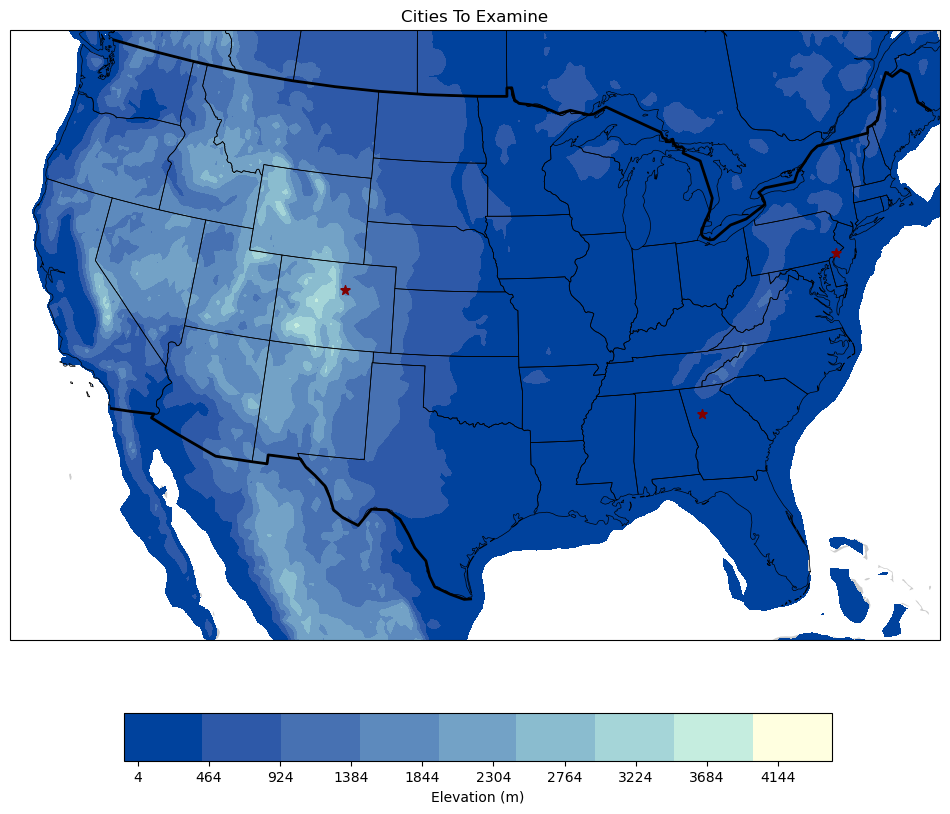

In [331]:
cmap=mplc.ListedColormap(['#00429d', '#2e59a8', '#4771b2', '#5d8abd', '#73a2c6', '#8abccf', '#a5d5d8', '#c5eddf', '#ffffe0']) #colorblind friendly colormap


fig = plt.figure(figsize = (12,12))
ax=fig.add_subplot(projection = ccrs.LambertConformal())
plt.title('Cities To Examine')
ax.set_extent([240, 286, 24, 50], ccrs.PlateCarree()) #lat/lon bounds are [West,East,South,North]
ax.add_feature(cfeature.LAND, facecolor='0.8')
countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                       facecolor="none", name="admin_0_boundary_lines_land")
ax.add_feature(countries, linewidth=2, edgecolor="black")
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)
ax.scatter([284.75,255,275.5],[40,39.75, 33.75],
           transform=ccrs.PlateCarree(),color='maroon',marker='*',s=50,zorder=5)

levels = np.arange(-86, 4500, 10)

cs=ax.contourf(elev.lon,elev.lat,
               elev.data.values,
               transform = ccrs.PlateCarree(), 
               levels = levels,
               cmap=cmap)
cax=fig.add_axes([0.22,0.14,0.59,0.04]) #Left, bottom, width, height
cbar = plt.colorbar(cs, cax = cax, orientation = 'horizontal')
cbar.set_label('Elevation (m)');

Let's start by getting a general sense of how temperature is evolving.

We'll define a function to make a set of plots: one for the present-day CO2 projection, one for the doubled projection, and one for the quadrupled.

In [332]:
def over(levs, variable, time):

    fig=plt.figure(figsize = (11,6))
    ax=fig.add_subplot(projection = ccrs.LambertConformal())
    ax.set_extent([240, 286, 24, 50], ccrs.PlateCarree()) #lat/lon bounds are [West,East,South,North]
    ax.add_feature(cfeature.LAND, facecolor='0.8')
    countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                           facecolor="none", name="admin_0_boundary_lines_land")
    ax.add_feature(countries, linewidth=2, edgecolor="black")
    ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)
    ax.scatter([284.75,255,275.5],[40,39.75, 33.75],
           transform=ccrs.PlateCarree(),color='maroon',marker='*',s=50,zorder=5)

    #Plot the data
    cs=ax.contourf(variable[0].lon,variable[0].lat,
               variable[6].isel(time =time),
               transform = ccrs.PlateCarree(),
               cmap=cmap, 
               levels = levs)
    
    ax.coastlines(color='w')
    plt.colorbar(cs)
    plt.title(variable[3])
    
    fig1=plt.figure(figsize = (11,6))
    ax=fig1.add_subplot(projection = ccrs.LambertConformal())
    ax.set_extent([240, 286, 24, 50], ccrs.PlateCarree()) #lat/lon bounds are [West,East,South,North]
    ax.add_feature(cfeature.LAND, facecolor='0.8')
    countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                           facecolor="none", name="admin_0_boundary_lines_land")
    ax.add_feature(countries, linewidth=2, edgecolor="black")
    ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)
    ax.scatter([284.75,255,275.5],[40,39.75, 33.75],
           transform=ccrs.PlateCarree(),color='maroon',marker='*',s=50,zorder=5)

    
    
    #Plot the data
    cs=ax.contourf(variable[1].lon,variable[1].lat,
               variable[7].isel(time =time),
               transform = ccrs.PlateCarree(),
               cmap=cmap, 
               levels = levs)
    
    ax.coastlines(color='w')
    plt.colorbar(cs)
    plt.title(variable[4])

    fig2=plt.figure(figsize = (11,6))
    ax=fig2.add_subplot(projection = ccrs.LambertConformal())
    ax.set_extent([240, 286, 24, 50], ccrs.PlateCarree()) #lat/lon bounds are [West,East,South,North]
    ax.add_feature(cfeature.LAND, facecolor='0.8')
    countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                           facecolor="none", name="admin_0_boundary_lines_land")
    ax.add_feature(countries, linewidth=2, edgecolor="black")
    ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)
    ax.scatter([284.75,255,275.5],[40,39.75, 33.75],
           transform=ccrs.PlateCarree(),color='maroon',marker='*',s=50,zorder=5)

    
    #Plot the data
    cs=ax.contourf(variable[2].lon,variable[2].lat,
               variable[8].isel(time =time),
               transform = ccrs.PlateCarree(),
               cmap=cmap, 
               levels = levs)
    
    ax.coastlines(color='w')
    plt.colorbar(cs)
    plt.title(variable[5]);

Let's plot the initial temperatures:

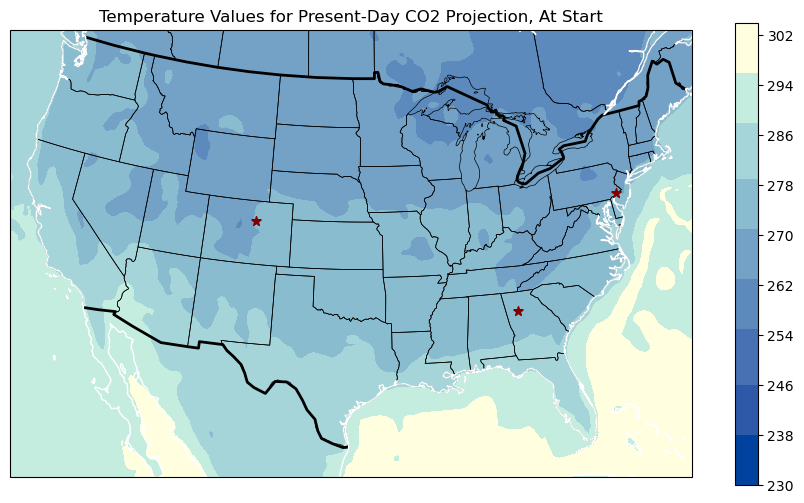

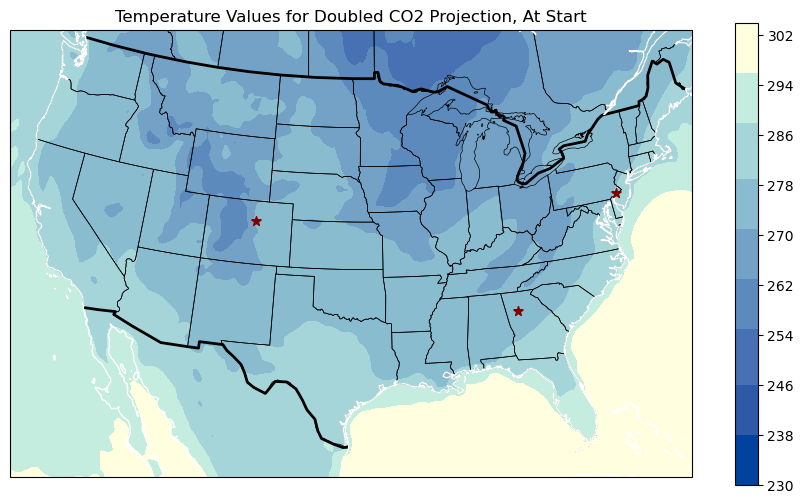

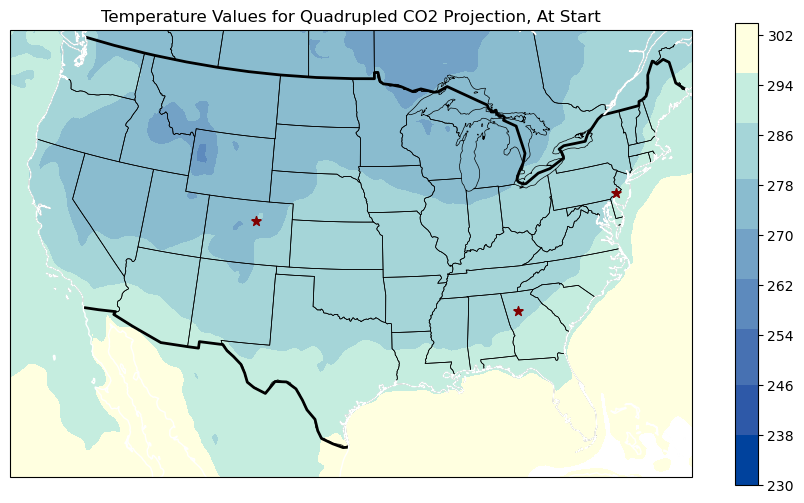

In [334]:
tempinit = [tempday, temp2, temp4, 'Temperature Values for Present-Day CO2 Projection, At Start','Temperature Values for Doubled CO2 Projection, At Start','Temperature Values for Quadrupled CO2 Projection, At Start', tempday.ts, temp2.ts, temp4.ts]

templevels = np.arange(230, 305, 1)

over(templevels, tempinit, 0)

As nice looking as these plots are (I love elevation maps), they can't tell us a whole lot - they're zoomed out so far that specific UHI spots aren't really visible. That's where the stars come into play! Let's zoom in on Philadelphia, PA, right outside where I grew up (go Flyers!).

First we'll define another function so we only have to type out this massive block of code once:

In [292]:
def cityzoom(cityextent, citypoint, time, titles, levels):
    gs=gridspec.GridSpec(nrows=2,ncols=2) #creating gridspec
    
    fig=plt.figure(figsize = (11,11))
    
    ax1 = fig.add_subplot(gs[0,0],projection = ccrs.LambertConformal())
    ax1.set_extent(cityextent, ccrs.PlateCarree()) #lat/lon bounds are [West,East,South,North]
    ax1.scatter(citypoint[0],citypoint[1], #plotting stars
               transform=ccrs.PlateCarree(),color='maroon',marker='*',s=100,zorder=5)
    ax1.add_feature(cfeature.LAND, facecolor='0.8')
    countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                       facecolor="none", name="admin_0_boundary_lines_land")
    ax1.add_feature(countries, linewidth=2, edgecolor="black")
    ax1.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)
    cs1=ax1.contourf(tempday.lon,tempday.lat,
               tempday.ts.isel(time =time),
               transform = ccrs.PlateCarree(),
               cmap=cmap,
               levels = levels[0])
    cbar = plt.colorbar(cs1, ax = ax1)
    ax1.coastlines(color='w')
    plt.title(titles[0])
    
    
    ax2=fig.add_subplot(gs[0,1],projection = ccrs.LambertConformal()) 
    ax2.set_extent(cityextent, ccrs.PlateCarree()) #lat/lon bounds are [West,East,South,North]
    ax2.scatter(citypoint[0],citypoint[1],
               transform=ccrs.PlateCarree(),color='maroon',marker='*',s=100,zorder=5)
    ax2.add_feature(cfeature.LAND, facecolor='0.8')
    countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                       facecolor="none", name="admin_0_boundary_lines_land")
    ax2.add_feature(countries, linewidth=2, edgecolor="black")
    ax2.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)
    cs2=ax2.contourf(temp2.lon,temp2.lat,
               temp2.ts.isel(time =time),
               transform = ccrs.PlateCarree(),
               cmap=cmap,
               levels = levels[1])
    cbar2 = plt.colorbar(cs2, ax = ax2)
    ax2.coastlines(color='w')
    plt.title(titles[1])
    
    ax3=fig.add_subplot(gs[1,0],projection = ccrs.LambertConformal()) 
    ax3.set_extent(cityextent, ccrs.PlateCarree()) #lat/lon bounds are [West,East,South,North]
    ax3.scatter(citypoint[0], citypoint[1],
               transform=ccrs.PlateCarree(),color='maroon',marker='*',s=100,zorder=5)
    ax3.add_feature(cfeature.LAND, facecolor='0.8')
    countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                           facecolor="none", name="admin_0_boundary_lines_land")
    ax3.add_feature(countries, linewidth=2, edgecolor="black")
    ax3.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)
    cs3=ax3.contourf(temp4.lon,temp4.lat,
                   temp4.ts.isel(time =time),
                   transform = ccrs.PlateCarree(),
                   cmap=cmap, 
                   levels = levels[2])
    cbar2 = plt.colorbar(cs3, ax = ax3)
    ax3.coastlines(color='w')
    plt.title(titles[2])
    
    plt.tight_layout()


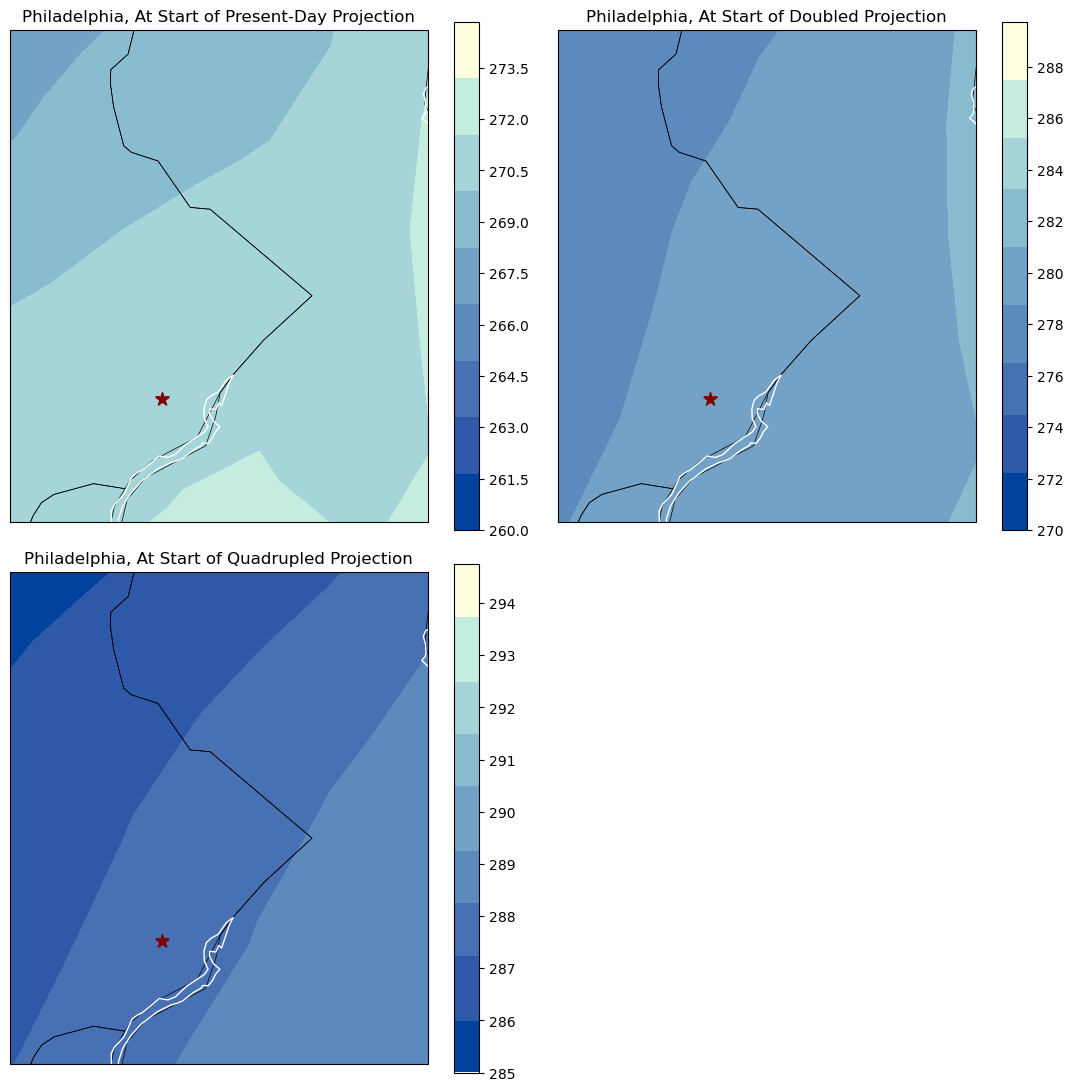

In [317]:
phillyextent = [284.5, 285.5, 39.75, 40.75]
phillypoints = [284.75,40]
phillytitles = ['Philadelphia, At Start of Present-Day Projection', 'Philadelphia, At Start of Doubled Projection', 'Philadelphia, At Start of Quadrupled Projection']
phillylevs = [np.arange(260, 275, 0.15),np.arange(270, 290, 0.25),np.arange(285, 295, 0.25)]
cityzoom(phillyextent, phillypoints,0, phillytitles, phillylevs)

Interesting! One of the difficulties of this dataset is that the resolution still makes it difficult to see UHIs even up close - I promise Philadelphia IS an urban heat island (we'll check it out specifically in the next section, just to be sure!). You can at least see the temperature increasing as we approach the coast. 

Let's check out a different city: Atlanta, Georgia.  

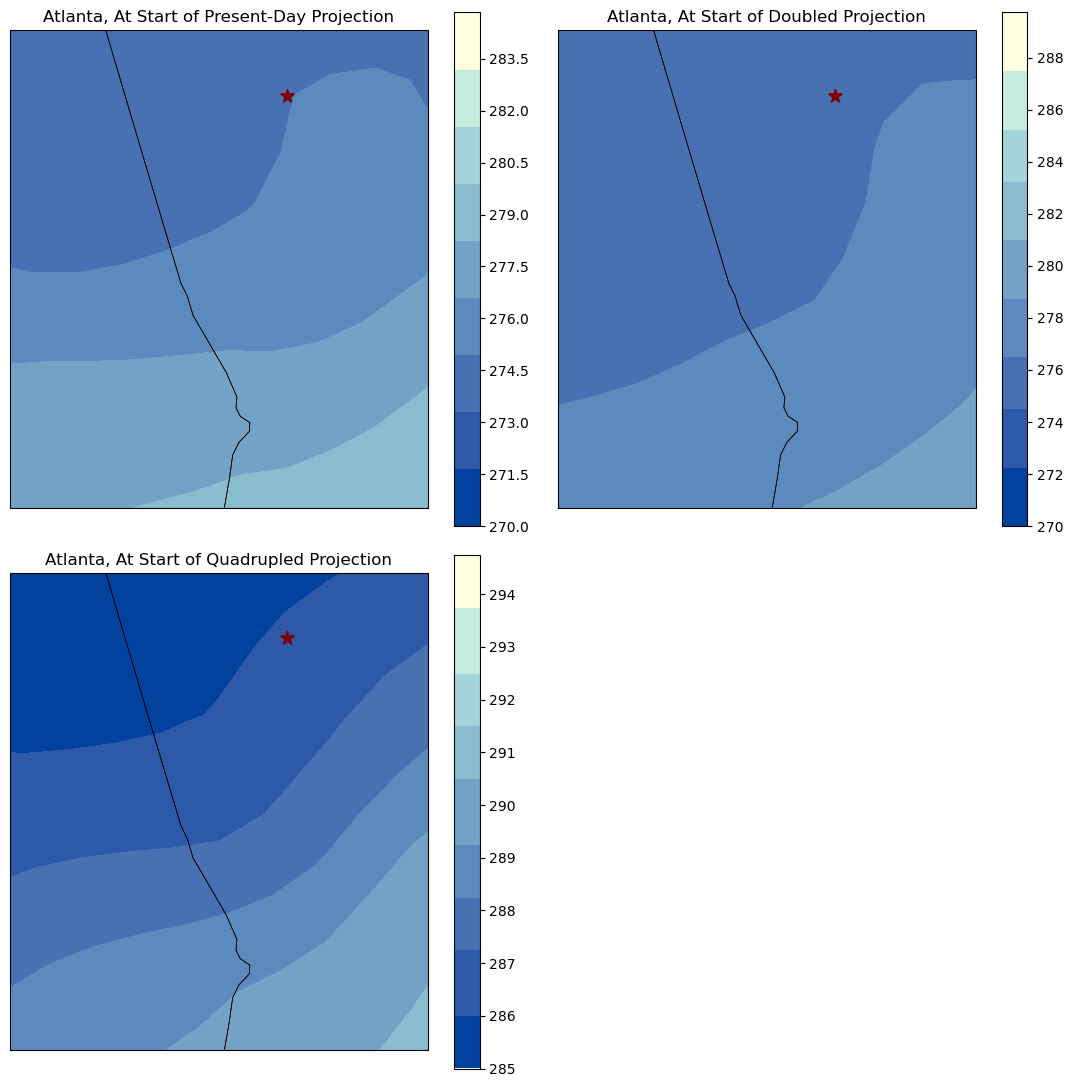

In [318]:
atlantaextent = [274, 276, 32, 34]
atlantapoints = [275.5],[33.75]
atlantatitles =['Atlanta, At Start of Present-Day Projection', 'Atlanta, At Start of Doubled Projection', 'Atlanta, At Start of Quadrupled Projection']

cityzoom(atlantaextent, atlantapoints, 0, atlantatitles, [np.arange(270, 285, 0.15),np.arange(270, 290, 0.25),np.arange(285, 295, 0.25)])

This is a little more interesting! We can see, at least in the present-day projection, a little bump where Atlanta is - a protrusion of warmer temps a bit further north (it doesn't look like the star is quite right, but that's because of the grid resolution - Atlanta is a little east than we're able to map). 

Let's step forward a bit: 

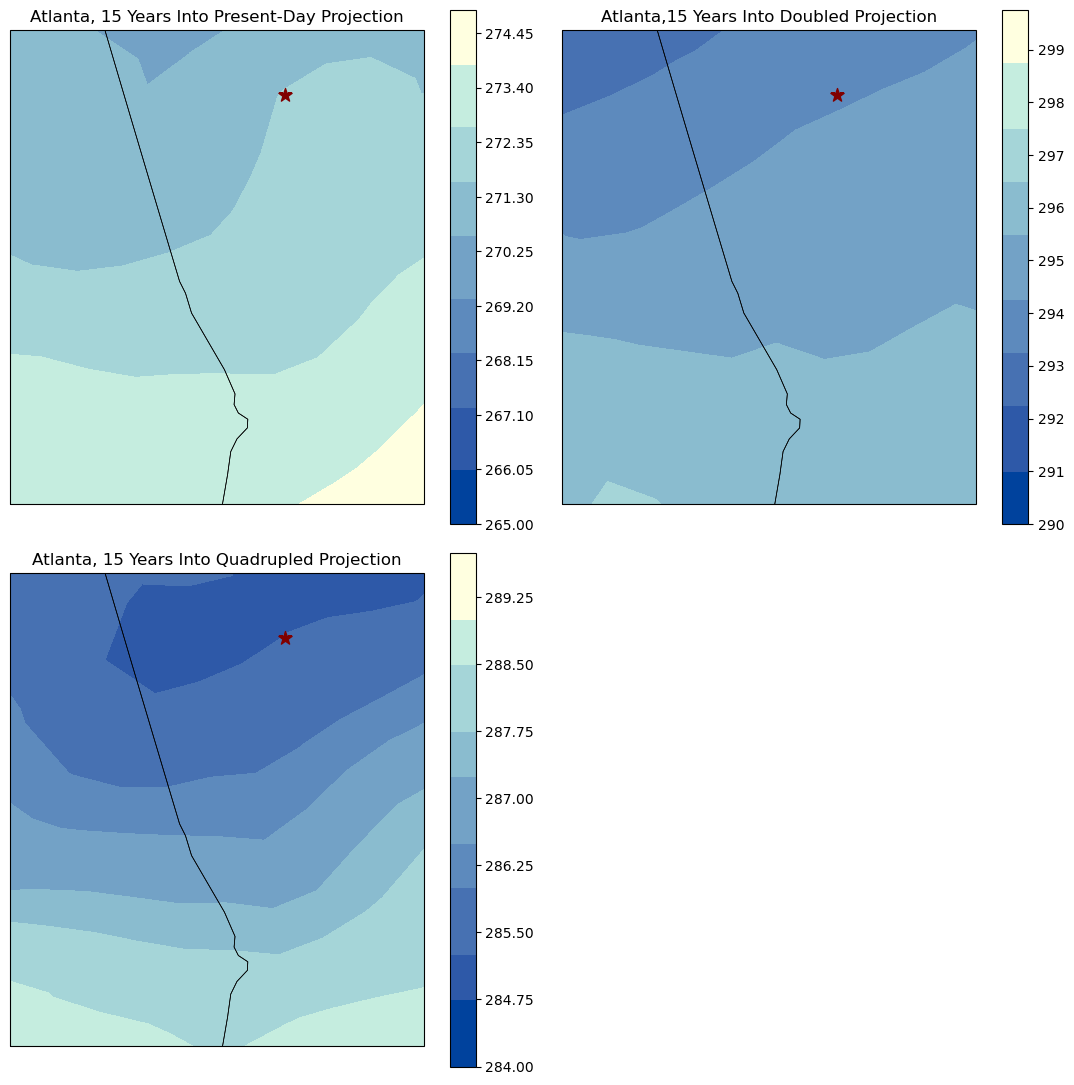

In [323]:
titles2 = ['Atlanta, 15 Years Into Present-Day Projection', 'Atlanta,15 Years Into Doubled Projection', 'Atlanta, 15 Years Into Quadrupled Projection']
cityzoom(atlantaextent, atlantapoints, 14, titles2, [np.arange(265, 275, 0.15),np.arange(290, 300, 0.25),np.arange(284, 290, 0.25)])#[np.arange(280,295,0.25), np.arange(270, 290, 0.25), np.arange(260, 290,0.25)])

Now this is wacky! In the present-day projection, Atlanta is still visibly a heat island in our resolution, but in the other two projections, it almost looks like Atlanta is actually **cooler** than its surroundings. 

For our next city, let's take a look at Denver, Colorado - we've done the south a little inland, we've done the Mid-Atlantic a little inland, but let's check out somewhere super far inland and pretty high up (which will dovetail nicely into an elevation analysis later). 

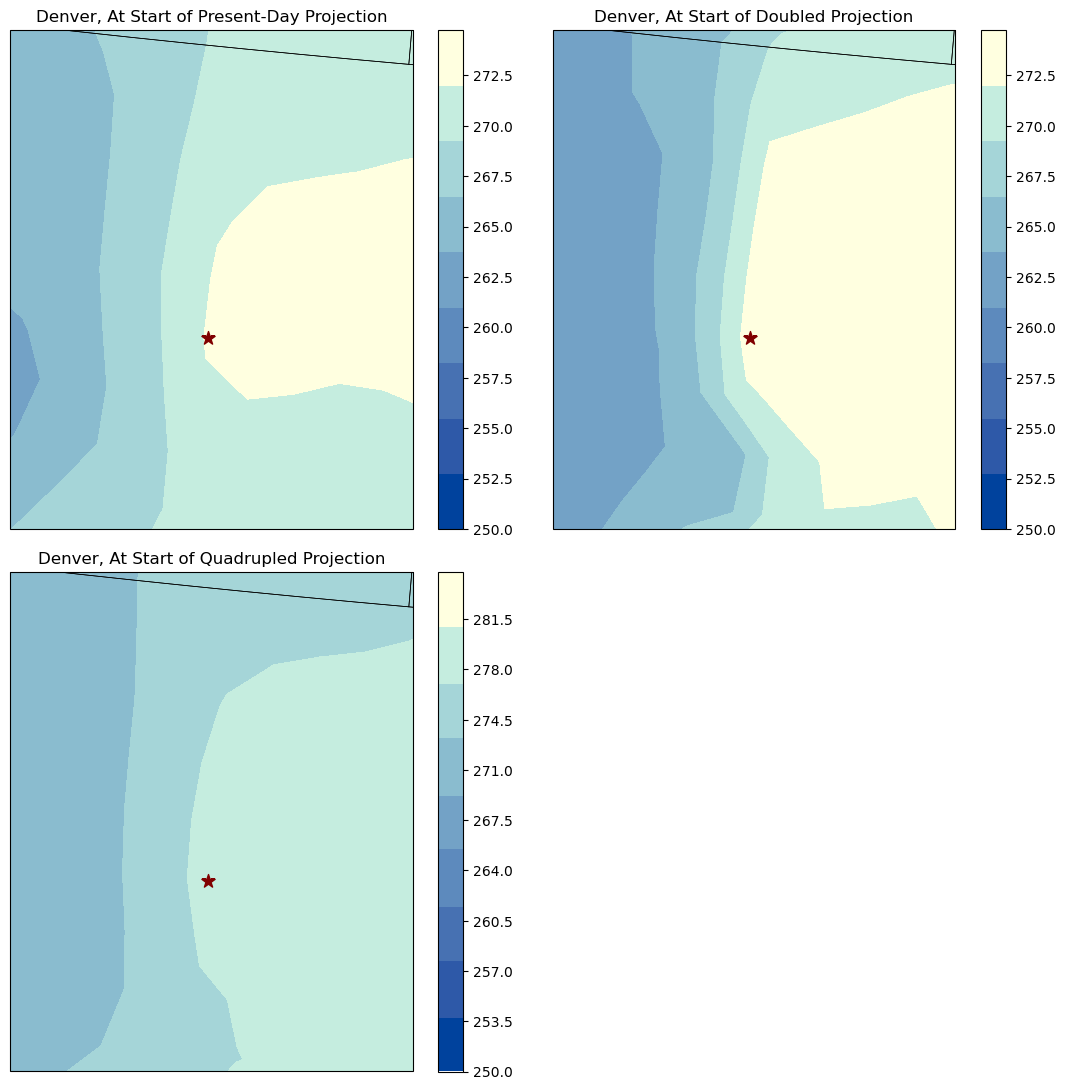

In [303]:
denverextent = [254, 256, 39, 41]
denverpoints = [255,39.75]
denvertitles = ['Denver, At Start of Present-Day Projection', 'Denver, At Start of Doubled Projection', 'Denver, At Start of Quadrupled Projection']

cityzoom(denverextent, denverpoints, 0, denvertitles, [np.arange(250, 275, 0.25), np.arange(250, 275, 0.25), np.arange(250, 285, 0.25)])

So we see again that there is a definite heat difference at Denver; it's important to keep in mind that the Rocky Mountains are *right there*, so they definitely help, but it is definitively noticeably warmer in Denver than in its western surroundings. This difference is also definitely more pronounced in the present-day and doubled projections; in the quadrupled projection it's starting to resolve out into what looks like just a bit of a regular contour warming up as we leave the Rockies. 

We'll step forward for Denver, and then we'll head on to a statistical analysis of our second dataset.

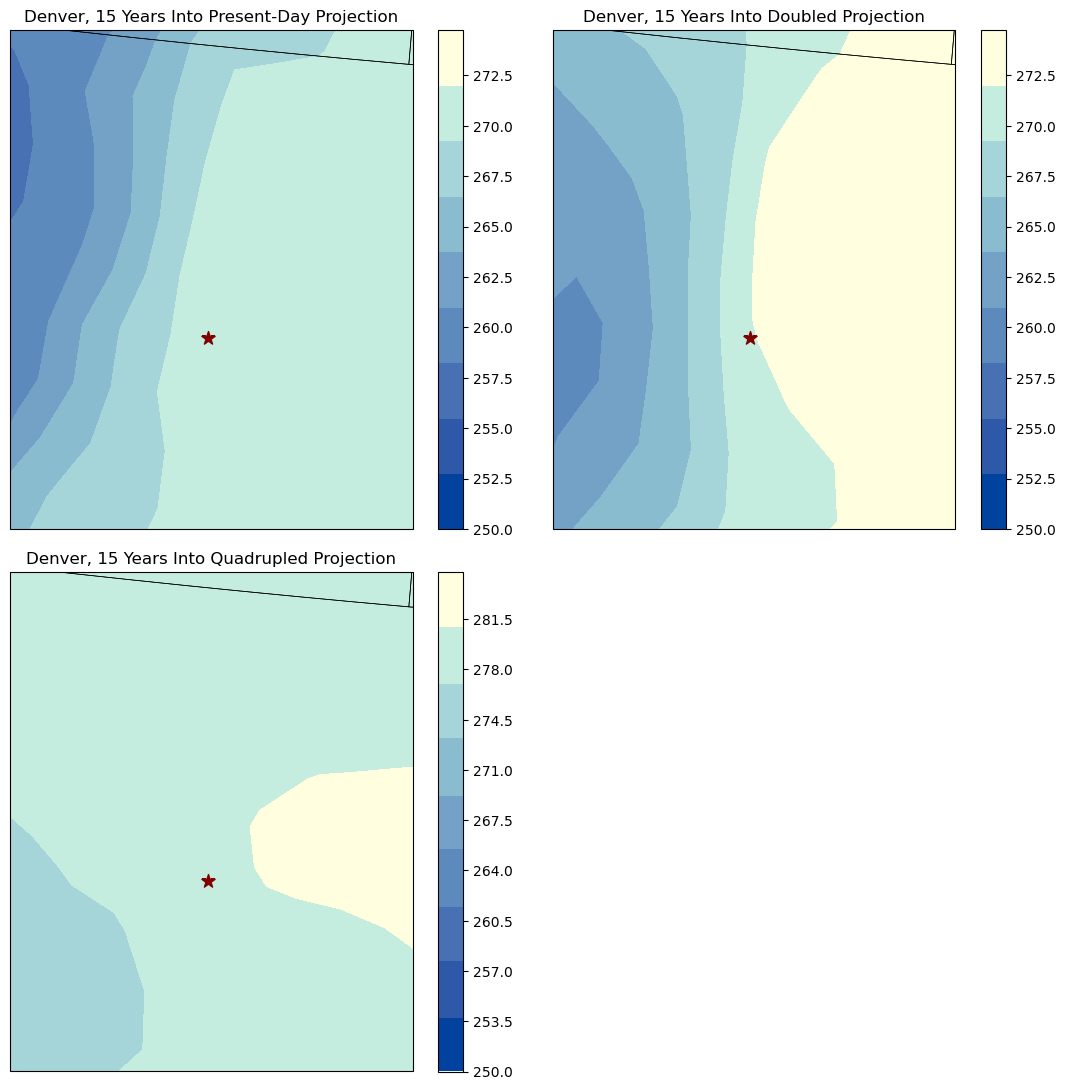

In [304]:
denvertitles2 = ['Denver, 15 Years Into Present-Day Projection', 'Denver, 15 Years Into Doubled Projection', 'Denver, 15 Years Into Quadrupled Projection']

cityzoom(denverextent, denverpoints, 14, denvertitles2, [np.arange(250, 275, 0.25), np.arange(250, 275, 0.25), np.arange(250, 285, 0.25)])

<b><font size=6, color='purple'>Section 2: Statistical Analysis of UHI Intensities

Let's read in the Chakraborty dataset and take a look at it. 

In [44]:
path = 'Census_UHI_US_Urbanized_recalculated_all.csv'
uhi_initial = pd.read_csv(path)
uhi_initial

Urban_name     DEM_rur  DEM_urb_CT  LST_rur_day  LST_rur_day_summer  \
0      Abilene, TX  535.737915  531.324716    32.359762           41.321518   
1      Abilene, TX  535.737915  529.480255    32.359762           41.321518   
2      Abilene, TX  535.737915  531.754935    32.359762           41.321518   
3      Abilene, TX  535.737915  529.951974    32.359762           41.321518   
4      Abilene, TX  535.737915  538.214401    32.359762           41.321518   
...            ...         ...         ...          ...                 ...   
55866     York, PA  177.767297  138.387254    19.864421           30.661792   
55867     York, PA  177.767297  138.216796    19.864421           30.661792   
55868     York, PA  177.767297  134.484025    19.864421           30.661792   
55869     York, PA  177.767297  154.659540    19.864421           30.661792   
55870     York, PA  177.767297  158.696356    19.864421           30.661792   

       LST_rur_day_winter  LST_rur_night  LST_rur_night_summer  \
0               21.427654      13.070011             22.300221   
1               21.427654      13.070011             22.300221   
2               21.427654      13.070011             22.300221   
3               21.427654      13.070011             22.300221   
4               21.427654      13.070011             22.300221   
...                   ...            ...                   ...   
55866            4.807914       5.100157             16.023335   
55867            4.807914       5.100157             16.023335   
55868            4.807914       5.100157             16.023335   
55869            4.807914       5.100157             16.023335   
55870            4.807914       5.100157             16.023335   

       LST_rur_night_winter  LST_urb_day_CT  ...  UHI_summer_day  \
0                  3.012549       33.713892  ...        1.441424   
1                  3.012549       32.328763  ...        0.068086   
2                  3.012549       31.197153  ...       -1.433007   
3                  3.012549       33.521105  ...        1.558981   
4                  3.012549       33.540637  ...        1.166338   
...                     ...             ...  ...             ...   
55866             -6.151086       20.433370  ...        1.596411   
55867             -6.151086       20.452129  ...        1.763085   
55868             -6.151086       20.882222  ...        1.442483   
55869             -6.151086       19.369545  ...       -0.430289   
55870             -6.151086       20.946161  ...        0.923122   

       UHI_summer_night  UHI_winter_day  UHI_winter_night  \
0              0.598608        0.703216         -0.207114   
1              0.485733       -0.401058          0.469019   
2             -0.158152       -0.973631         -0.058008   
3              1.171135        0.356536          0.837196   
4              1.014167        0.662838          0.645387   
...                 ...             ...               ...   
55866         -0.194401       -0.022468         -0.305627   
55867         -0.486579       -0.241188         -0.612012   
55868          0.093311        0.497314         -0.510333   
55869          0.043507       -0.307636         -0.491769   
55870          0.764404        1.266859          0.224554   

       UHI_annual_day_city  UHI_annual_night_city  UHI_summer_day_city  \
0                 0.407165               0.245388             0.447746   
1                 0.407165               0.245388             0.447746   
2                 0.407165               0.245388             0.447746   
3                 0.407165               0.245388             0.447746   
4                 0.407165               0.245388             0.447746   
...                    ...                    ...                  ...   
55866             0.797149               0.099121             1.142610   
55867             0.797149               0.099121             1.142610   
55868             0.797149               0.099121 

When we read in the dataset, we'll notice that it has about 56,000 rows, many, many of which are duplicate entires for different cities, varying based on elevation (the 'DEM_' variables). We want to keep the elevation variable sort of accurate - we're going to use it later - but we don't want to have to deal with so many different entries for, say, Abilene, TX, so we'll average all the duplicates entries together to create one averaged elevation for each city, which will have the bonus side effect of significantly shortening our dataset. Before importing this dataset, I also removed a lot of extraneous variables that I wasn't planning on using. The full dataset can be found at the link provided at the beginning of this notebook. 

In [45]:
uhi = uhi_initial.groupby('Urban_name').mean()
uhi

DEM_rur  DEM_urb_CT  \
Urban_name                                                           
Aberdeen--Bel Air South--Bel Air North, MD   88.604260   77.081522   
Abilene, TX                                 535.737915  531.911813   
Aguadilla--Isabela--San Sebastián, PR       159.889284  142.346668   
Akron, OH                                   329.503521  322.884414   
Albany, GA                                   74.070327   72.481739   
...                                                ...         ...   
York, PA                                    177.767297  157.004130   
Youngstown, OH--PA                          310.661604  305.269357   
Yuba City, CA                                18.010582   18.603063   
Yuma, AZ--CA                                 58.130021   60.034465   
Zephyrhills, FL                              39.619228   38.289943   

                                            LST_rur_day  LST_rur_day_summer  \
Urban_name                                                                    
Aberdeen--Bel Air South--Bel Air North, MD    19.613490           29.561848   
Abilene, TX                                   32.359762           41.321518   
Aguadilla--Isabela--San Sebastián, PR         29.032017           29.539047   
Akron, OH                                     20.065804           28.576523   
Albany, GA                                    27.568219           34.275039   
...                                                 ...                 ...   
York, PA                                      19.864421           30.661792   
Youngstown, OH--PA                            20.905243           29.441070   
Yuba City, CA                                 31.054606           43.639693   
Yuma, AZ--CA                                  40.148879           52.189967   
Zephyrhills, FL                               30.244571           33.643585   

                                            LST_rur_day_winter  LST_rur_night  \
Urban_name                                                                      
Aberdeen--Bel Air South--Bel Air North, MD            6.471246       6.655032   
Abilene, TX                                          21.427654      13.070011   
Aguadilla--Isabela--San Sebastián, PR                27.864381      20.141123   
Akron, OH                                             4.077606       4.106009   
Albany, GA                                           19.056685      13.289871   
...                                                        ...            ...   
York, PA                                              4.807914       5.100157   
Youngstown, OH--PA                                    4.832689       4.663659   
Yuba City, CA                                        17.197393      10.176267   
Yuma, AZ--CA                                         25.961800      15.128810   
Zephyrhills, FL                                      25.305172      15.840637   

                                            LST_rur_night_summer  \
Urban_name                                                         
Aberdeen--Bel Air South--Bel Air North, MD             17.180290   
Abilene, TX                                            22.300221   
Aguadilla--Isabela--San Sebastián, PR                  20.993632   
Akron, OH                                              14.821784   
Albany, GA                                             21.274086   
...                                                          ...   
York, PA                                               16.023335   
Youngstown, OH--PA                                     14.853089   
Yuba City, CA                                          17.328043   
Yuma, AZ--CA                                           25.086088   
Zephyrhills, FL                                        21.137416   

                                            LST_rur_night_winter  \
Urban_name                                                         
Aberdeen--Bel Air South--Bel Air 

There are a lot of variables in here, so let's go through them real quick: 

1. Ending in _rur : rural reference area
2. Ending in _urb_CT : urban variable, defined using "the spatial mean of pixels intersecting the Census Tract clipped to the urbanized area (one value per census tract). This should be equal to the _CT for census tracts that are completely within the urbanized areas".
3.  Starting with DEM_ : Digital Elevation Model - the elevation of the city
4.  Starting with LST_ : land surface temperature, one of the most common metrics for studying UHI intensity
5.  Starting with UHI_ : Urban Heat Island, calculated as LST urban - LST rural 

Each of these variables has a summer, winter, day, night, and annual value - and combinations of all of those things.

Let's take a quick look at some summary statistics for some of our UHI data. We're mostly interested in the wintertime, because that's what a lot of our data from the first part is looking at, so we'll separate out winter and summer variables - that way we can investigate winter first, but still compare it to summer later. This also means the variables display more concisely - better for at-a-glance analyses.

In [113]:
uhiwinter = uhi[['DEM_rur', 'DEM_urb_CT','LST_rur_day_winter','LST_rur_night_winter', 'LST_urb_night_CT_winter', 'LST_urb_day_CT_winter',
                 'UHI_winter_day', 'UHI_winter_night']].copy()

uhisummer = uhi[['DEM_rur', 'DEM_urb_CT','LST_rur_day_summer','LST_rur_night_summer', 'LST_urb_night_CT_summer', 'LST_urb_day_CT_summer',
                 'UHI_summer_day', 'UHI_summer_night']].copy()
uhiwinter.describe()

DEM_rur   DEM_urb_CT  LST_rur_day_winter  LST_rur_night_winter  \
count   497.000000   497.000000          497.000000            497.000000   
mean    278.143704   269.927392           11.526916             -1.044570   
std     367.292647   368.060529            9.166781              7.683102   
min      -8.807052    -6.737099          -20.009604            -23.208543   
25%      73.085046    56.125025            3.990732             -7.015446   
50%     187.192700   181.641941           11.494080             -1.290733   
75%     289.211838   280.922232           18.565208              3.928481   
max    2109.512280  2107.536226           30.526708             20.843318   

       LST_urb_night_CT_winter  LST_urb_day_CT_winter  UHI_winter_day  \
count               497.000000             497.000000      497.000000   
mean                 -0.772869              12.106312        0.579396   
std                   7.690823               9.163835        0.448489   
min                 -23.068187             -19.870715       -0.491766   
25%                  -6.923052               4.742433        0.280675   
50%                  -1.102183              11.686523        0.508246   
75%                   4.103228              19.250311        0.834174   
max                  20.922559              32.406101        2.791696   

       UHI_winter_night  
count        497.000000  
mean           0.271701  
std            0.308562  
min           -2.121264  
25%            0.077408  
50%            0.225276  
75%            0.438065  
max            1.487019

We can see at a glance from this that UHI values are significantly stronger during the day than at night. This is interesting to note - according to [UCAR](https://scied.ucar.edu/learning-zone/climate-change-impacts/urban-heat-islands) the highest UHI values tend to occur 3-5 hours after sunset, as the rural areas cool off faster than urban areas and thus the temperature difference is highest. I'd be interested to see when this dataset considers night, but it wasn't included in the basic data documentation. We'll investigate the LST night and day differences later as well, to try to get a clearer picture of what may cause this discrepancy.

Next we'll take a look at summer values, to get an initial baseline of what those will look like. 

In [112]:
uhisummer.describe()

DEM_rur   DEM_urb_CT  LST_rur_day_summer  LST_rur_night_summer  \
count   497.000000   497.000000          497.000000            497.000000   
mean    278.143704   269.927392           34.088486             17.525235   
std     367.292647   368.060529            6.047142              3.505067   
min      -8.807052    -6.737099           21.809145              7.307911   
25%      73.085046    56.125025           29.835475             14.957815   
50%     187.192700   181.641941           32.491826             16.968539   
75%     289.211838   280.922232           36.539395             20.646778   
max    2109.512280  2107.536226           54.313594             27.523501   

       LST_urb_night_CT_summer  LST_urb_day_CT_summer  UHI_summer_day  \
count               497.000000             497.000000      497.000000   
mean                 17.971434              35.248884        1.160398   
std                   3.487708               5.775855        0.879859   
min                   7.417729              22.536419       -1.290180   
25%                  15.428228              31.408590        0.577528   
50%                  17.383824              33.679117        1.034780   
75%                  21.230591              37.864827        1.593017   
max                  27.874138              54.121760        5.347899   

       UHI_summer_night  
count        497.000000  
mean           0.446200  
std            0.289199  
min           -0.243523  
25%            0.241051  
50%            0.400491  
75%            0.619654  
max            1.552114

Note here that the UHI for the summer, both day and night, is greater than in the winter. This is also an interesting result - studies tend to disagree on whether summer or winter has a more powerful UHI effect (though most scholarship agrees that they are both stronger than fall or spring), but it seems this algorithm would vote for summer!

Let's check out LST differences between night and day for rural areas and urban areas.

In [108]:
uhi['LST_rur_diff_winter'] = uhi.LST_rur_day_winter - uhi.LST_rur_night_winter
uhi['LST_urb_diff_winter'] = uhi.LST_urb_day_CT_winter - uhi.LST_urb_night_CT_winter

uhi[['LST_rur_diff_winter', 'LST_urb_diff_winter']].describe()

LST_rur_diff_winter  LST_urb_diff_winter
count           497.000000           497.000000
mean             12.571487            12.879182
std               3.351153             3.284230
min               2.725392             3.082303
25%              10.297714            10.653050
50%              12.091959            12.448848
75%              14.185995            14.424310
max              24.683478            24.448767

It's interesting to note that, based on these summary statistics, the diurnal variation in LST is actually quite similar across urban and rural regions. Let's look at the summer values for this variation and compare them to our winter values!

In [109]:
uhi['LST_rur_diff_summer'] = uhi.LST_rur_day_summer - uhi.LST_rur_night_summer
uhi['LST_urb_diff_summer'] = uhi.LST_urb_day_CT_summer - uhi.LST_urb_night_CT_summer

uhi[['LST_rur_diff_summer', 'LST_urb_diff_summer','LST_rur_diff_winter', 'LST_urb_diff_winter']].describe()

LST_rur_diff_summer  LST_urb_diff_summer  LST_rur_diff_winter  \
count           497.000000           497.000000           497.000000   
mean             16.563251            17.277450            12.571487   
std               6.210041             5.894480             3.351153   
min               7.919447             8.065861             2.725392   
25%              12.676170            13.440168            10.297714   
50%              13.993803            15.132095            12.091959   
75%              18.573623            19.369184            14.185995   
max              34.673685            34.277980            24.683478   

       LST_urb_diff_winter  
count           497.000000  
mean             12.879182  
std               3.284230  
min               3.082303  
25%              10.653050  
50%              12.448848  
75%              14.424310  
max              24.448767

Now that's interesting! We can see that not only is the LST difference on average about 4-5 degrees greater in the summer, it's still about the same between rural and urban areas. Let's plot these as a histogram:

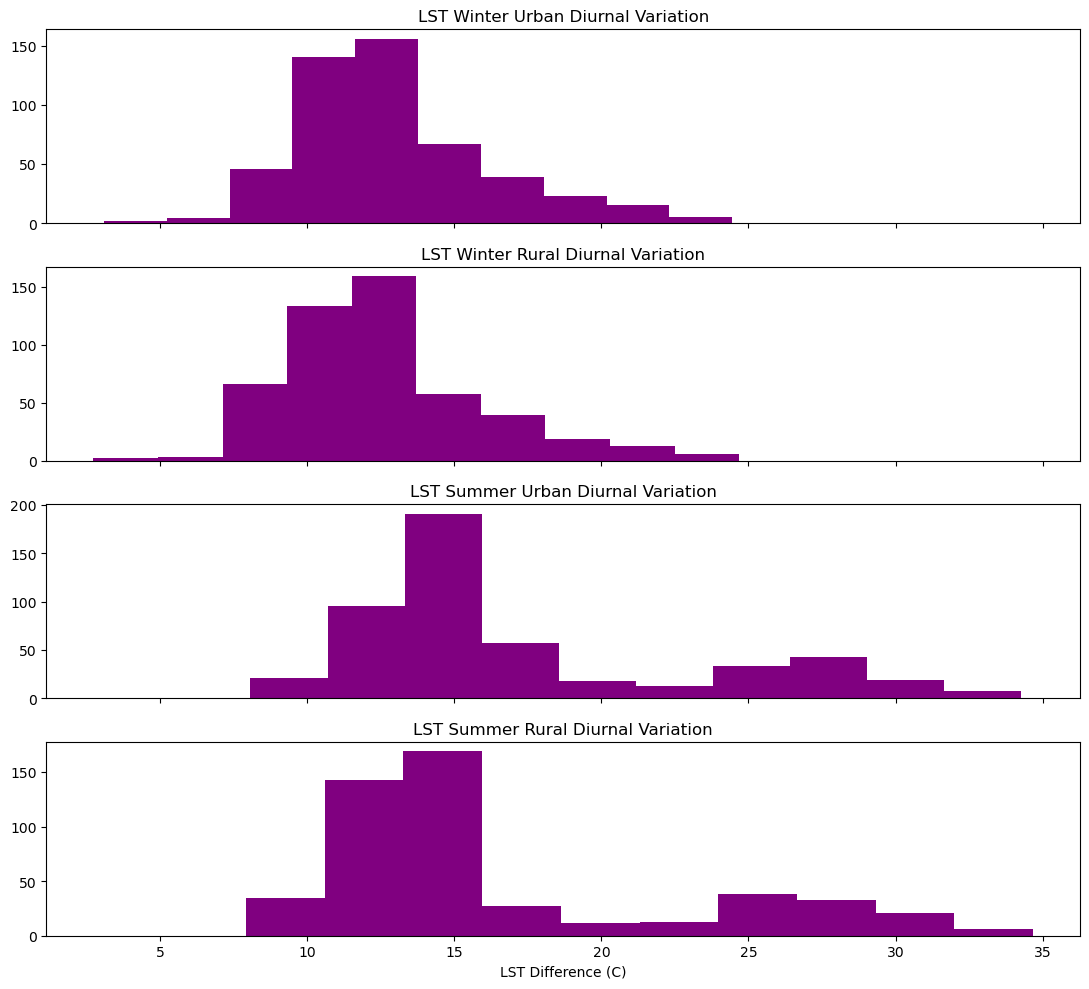

In [185]:
fig,ax = plt.subplots(4,1, figsize = (11,10),sharex =True)
axs = ax.flatten()

axs[0].hist(uhi['LST_urb_diff_winter'],color = 'purple')
axs[1].hist(uhi['LST_rur_diff_winter'], color = 'purple')
axs[0].set_title('LST Winter Urban Diurnal Variation')
axs[1].set_title('LST Winter Rural Diurnal Variation')
axs[2].hist(uhi['LST_urb_diff_summer'], color = 'purple')
axs[3].hist(uhi['LST_rur_diff_summer'], color = 'purple')
axs[2].set_title('LST Summer Urban Diurnal Variation')
axs[3].set_title('LST Summer Rural Diurnal Variation')
axs[3].set_xlabel('LST Difference (C)')

plt.tight_layout();

We can see visually as well that the distribution of the diurnal variations are very similar in their respective seasons, and we can see the higher maximums and peaks in summer, though the shapes of the distributions are mostly similar. It's interesting that those smaller values (in the 2-7 range) we see in the winter disappear in the summer, but mostly get absorbed into the 8-10 bucket instead of remaining as somewhat outliers towards the lower end. 

Let's take a look at elevation dependencies. I want to check different metrics of UHI intensity against elevations as measured in the dataset to see what, if any, impact elevation has on UHI intensity. We'll do some plotting, run some regressions, and see what happens. 

We'll start out with basic scatter plots comparing UHI intensities seasonally as well as the winter LST differences we calculated. 

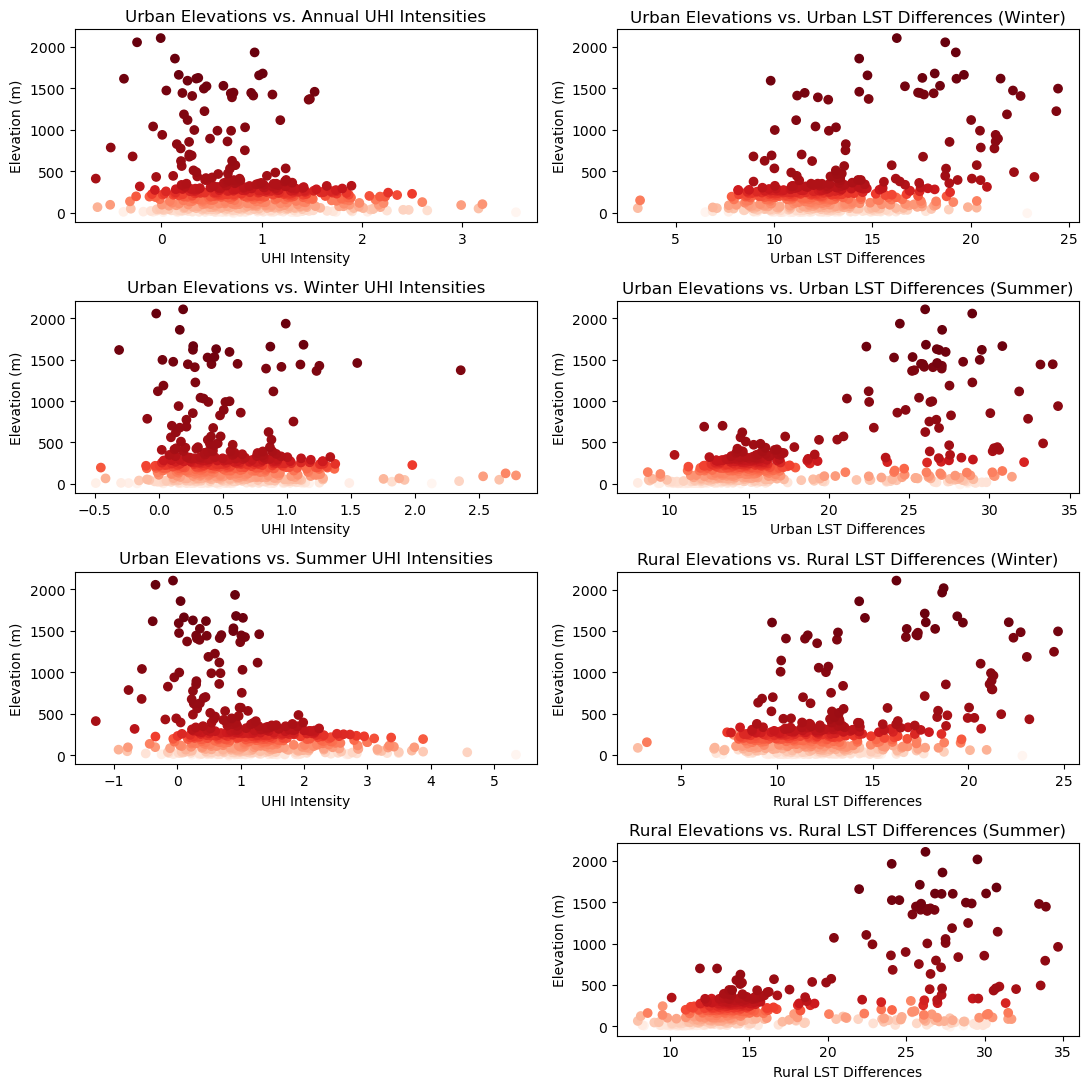

In [182]:
uhisorted = uhi.sort_values('DEM_urb_CT')

gs=gridspec.GridSpec(nrows=4,ncols=2) 

colors = cm.Reds(np.linspace(0, 1, len(uhisorted.DEM_urb_CT)))
fig=plt.figure(figsize = (11,11))

ax1=fig.add_subplot(gs[0,0]) 
ax1.scatter(uhisorted.UHI_annual_day,uhisorted.DEM_urb_CT, color = colors)
plt.title('Urban Elevations vs. Annual UHI Intensities')
plt.ylabel('Elevation (m)')
plt.xlabel('UHI Intensity')

ax2 = fig.add_subplot(gs[1,0])
ax2.scatter(uhisorted.UHI_winter_day, uhisorted.DEM_urb_CT, color = colors)
plt.title('Urban Elevations vs. Winter UHI Intensities')
plt.ylabel('Elevation (m)')
plt.xlabel('UHI Intensity')


ax3 = fig.add_subplot(gs[2,0])
ax3.scatter(uhisorted.UHI_summer_day, uhisorted.DEM_urb_CT, color = colors)
plt.title('Urban Elevations vs. Summer UHI Intensities')
plt.ylabel('Elevation (m)')
plt.xlabel('UHI Intensity')

ax4=fig.add_subplot(gs[0,1]) 
ax4.scatter(uhisorted.LST_urb_diff_winter,uhisorted.DEM_urb_CT, color = colors)
plt.title('Urban Elevations vs. Urban LST Differences (Winter)')
plt.ylabel('Elevation (m)')
plt.xlabel('Urban LST Differences')

ax5 = fig.add_subplot(gs[3,1])
ax5.scatter(uhisorted.LST_rur_diff_summer, uhisorted.DEM_rur, color = colors)
plt.title('Rural Elevations vs. Rural LST Differences (Summer)')
plt.ylabel('Elevation (m)')
plt.xlabel('Rural LST Differences')

ax6 = fig.add_subplot(gs[2,1])
ax6.scatter(uhisorted.LST_rur_diff_winter, uhisorted.DEM_rur, color = colors)
plt.title('Rural Elevations vs. Rural LST Differences (Winter)')
plt.ylabel('Elevation (m)')
plt.xlabel('Rural LST Differences')

ax7 = fig.add_subplot(gs[1,1])
ax7.scatter(uhisorted.LST_urb_diff_summer, uhisorted.DEM_urb_CT, color = colors)
plt.title('Urban Elevations vs. Urban LST Differences (Summer)')
plt.ylabel('Elevation (m)')
plt.xlabel('Urban LST Differences')


plt.tight_layout();

So what do we get from these plots? UHI intensities don't seem to have an exceptionally high dependence on elevation, though it does seem like most high elevations are on average lower intensity UHIs. More interestingly, though, the daily LST differences DO seem to have some level of dependency, and a more positive one than UHI intensities are showing! This is worth investigating further. Let's run linear regressions and plot that in against the data. 

In [138]:
#perform linear regressions

regurbLSTwinter = stat.linregress(uhi.LST_urb_diff_winter, uhi.DEM_urb_CT)
regurbLSTsummer = stat.linregress(uhi.LST_urb_diff_summer, uhi.DEM_urb_CT)
regrurLSTwinter = stat.linregress(uhi.LST_rur_diff_winter, uhi.DEM_rur)
regrurLSTsummer = stat.linregress(uhi.LST_rur_diff_summer, uhi.DEM_rur)

In [139]:
#define a function to plot the regressions
def regr(x, reg):
    y = x*reg[0] + reg[1]
    return y

x = np.linspace(4, 35, 1000)

y1 = regr(x, regurbLSTwinter)
y2 = regr(x, regurbLSTsummer)
y3 = regr(x, regrurLSTwinter)
y4 = regr(x, regrurLSTsummer)

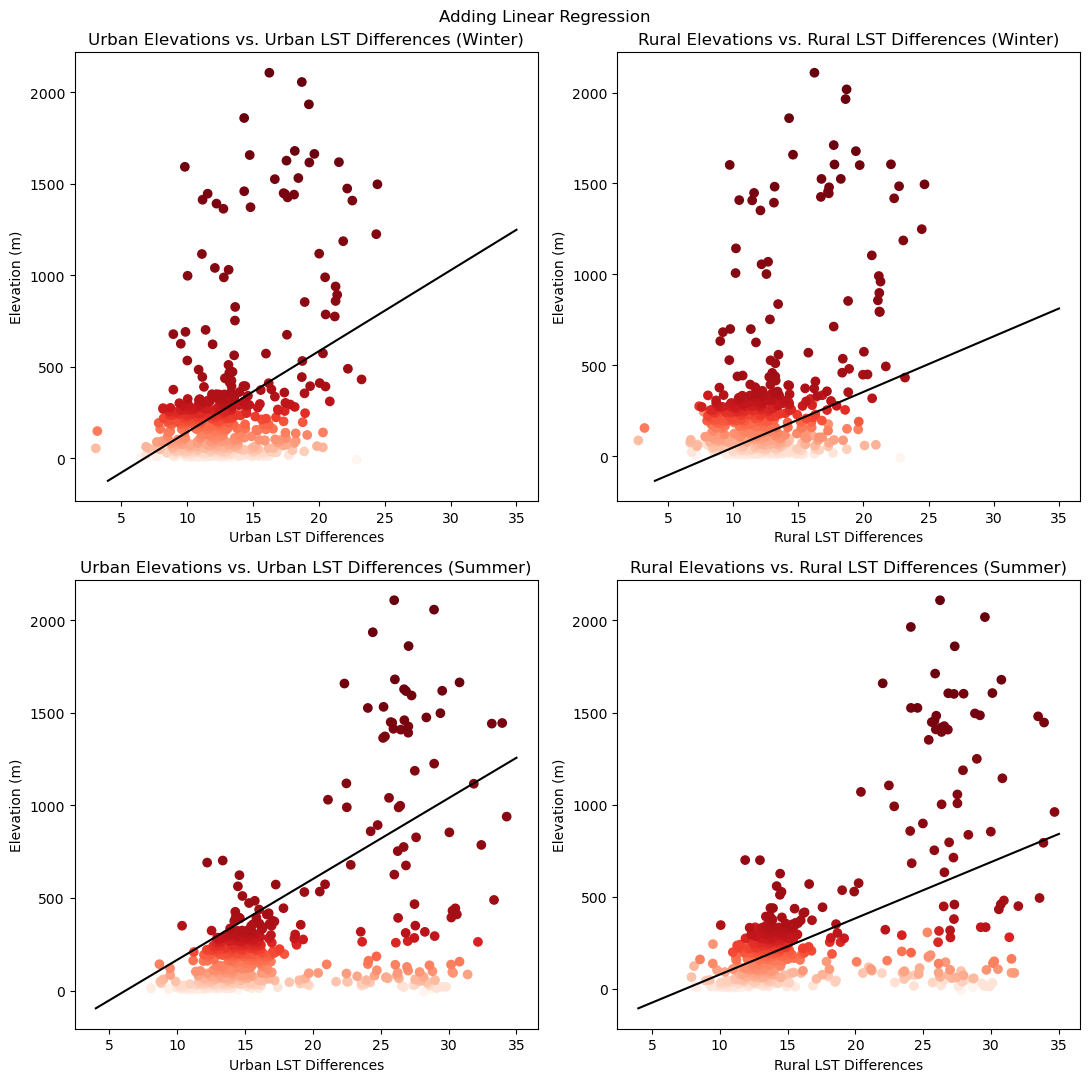

In [181]:
gs=gridspec.GridSpec(nrows=2,ncols=2) 

colors = cm.Reds(np.linspace(0, 1, len(uhisorted.DEM_urb_CT)))
fig=plt.figure(figsize = (11,11))
fig.suptitle('Adding Linear Regression')

ax1=fig.add_subplot(gs[0,0]) 
ax1.scatter(uhisorted.LST_urb_diff_winter,uhisorted.DEM_urb_CT, color = colors)
ax1.plot(x,y1, color = 'black')
plt.title('Urban Elevations vs. Urban LST Differences (Winter)')
plt.ylabel('Elevation (m)')
plt.xlabel('Urban LST Differences')

ax2 = fig.add_subplot(gs[1,1])
ax2.scatter(uhisorted.LST_rur_diff_summer, uhisorted.DEM_rur, color = colors)
ax2.plot(x, y4, color = 'black')
plt.title('Rural Elevations vs. Rural LST Differences (Summer)')
plt.ylabel('Elevation (m)')
plt.xlabel('Rural LST Differences')

ax3 = fig.add_subplot(gs[0,1])
ax3.scatter(uhisorted.LST_rur_diff_winter, uhisorted.DEM_rur, color = colors)
ax3.plot(x, y2, color = 'black')
plt.title('Rural Elevations vs. Rural LST Differences (Winter)')
plt.ylabel('Elevation (m)')
plt.xlabel('Rural LST Differences')

ax4 = fig.add_subplot(gs[1,0])
ax4.scatter(uhisorted.LST_urb_diff_summer, uhisorted.DEM_urb_CT, color = colors)
ax4.plot(x, y3, color = 'black')
plt.title('Urban Elevations vs. Urban LST Differences (Summer)')
plt.ylabel('Elevation (m)')
plt.xlabel('Urban LST Differences')

plt.tight_layout()

Cool! That's not a super good correlation, but it's definitely a positive line! Let's print the R and p values for these regressions, to see just how significant our results actually are. 

In [147]:
print('R value Urban Winter LST Difference:',regurbLSTwinter[2], 
      '\nR value Urban Summer LST DIfference:', regurbLSTsummer[2], 
      '\nR value Rural Winter LST Difference:', regrurLSTwinter[2],
      '\nR value Rural Summer LST Difference:', regrurLSTsummer[2],
      '\n'
      '\np value Urban Winter LST Difference:', regurbLSTwinter[3], 
      '\np value Urban Summer LST Difference:', regurbLSTsummer[3], 
      '\np value Rural Winter LST Difference:', regrurLSTwinter[3], 
      '\np value Rural Summer LST Difference:', regrurLSTsummer[3])

R value Urban Winter LST Difference: 0.3949848675357716 
R value Urban Summer LST DIfference: 0.4899173692491141 
R value Rural Winter LST Difference: 0.39820905624085384 
R value Rural Summer LST Difference: 0.5163240355533807 

p value Urban Winter LST Difference: 5.2641258211872536e-20 
p value Urban Summer LST Difference: 2.292153973480933e-31 
p value Rural Winter LST Difference: 2.4642375200905245e-20 
p value Rural Summer LST Difference: 3.2537867959184973e-35


So the R values are not great but they seem to indicate at least some correlation. The p values, however, from my...limited understanding of p-values, are NOT promising! This isn't super surprising - I would hesitate to say that JUST elevation would have an extremely significant effect on the urban heat island - but I would be interested to see a future study that was able to include other topography variables, like including statistics for bodies of water, proximity to mountains though not in mountain ranges (think Denver), or some other values. 

<b><font size=6, color='purple'>Section 3: Quick Time Series of Cities We Looked At

I went to [Yale's UHI Global Explorer](https://yceo.users.earthengine.app/view/uhimap) and exported some SUHI time series for Philly, Atlanta, and Denver - the cities we looked at in part 1. There's not a lot of information in those time series, just annual and seasonal variability, but I'll plot them real quick to give an example of how this algorithm behaves over time, and also an impression of historical data. 

Let's load the data:

In [325]:
atlantaa = pd.read_csv('atlantaan.csv')
atlantas = pd.read_csv('atlantase.csv')
denveran = pd.read_csv('denveran.csv')
denverse = pd.read_csv('denverse.csv')
phillyan = pd.read_csv('phillyan.csv')
phillyse = pd.read_csv('phillyse.csv')

Aaand plot it: 

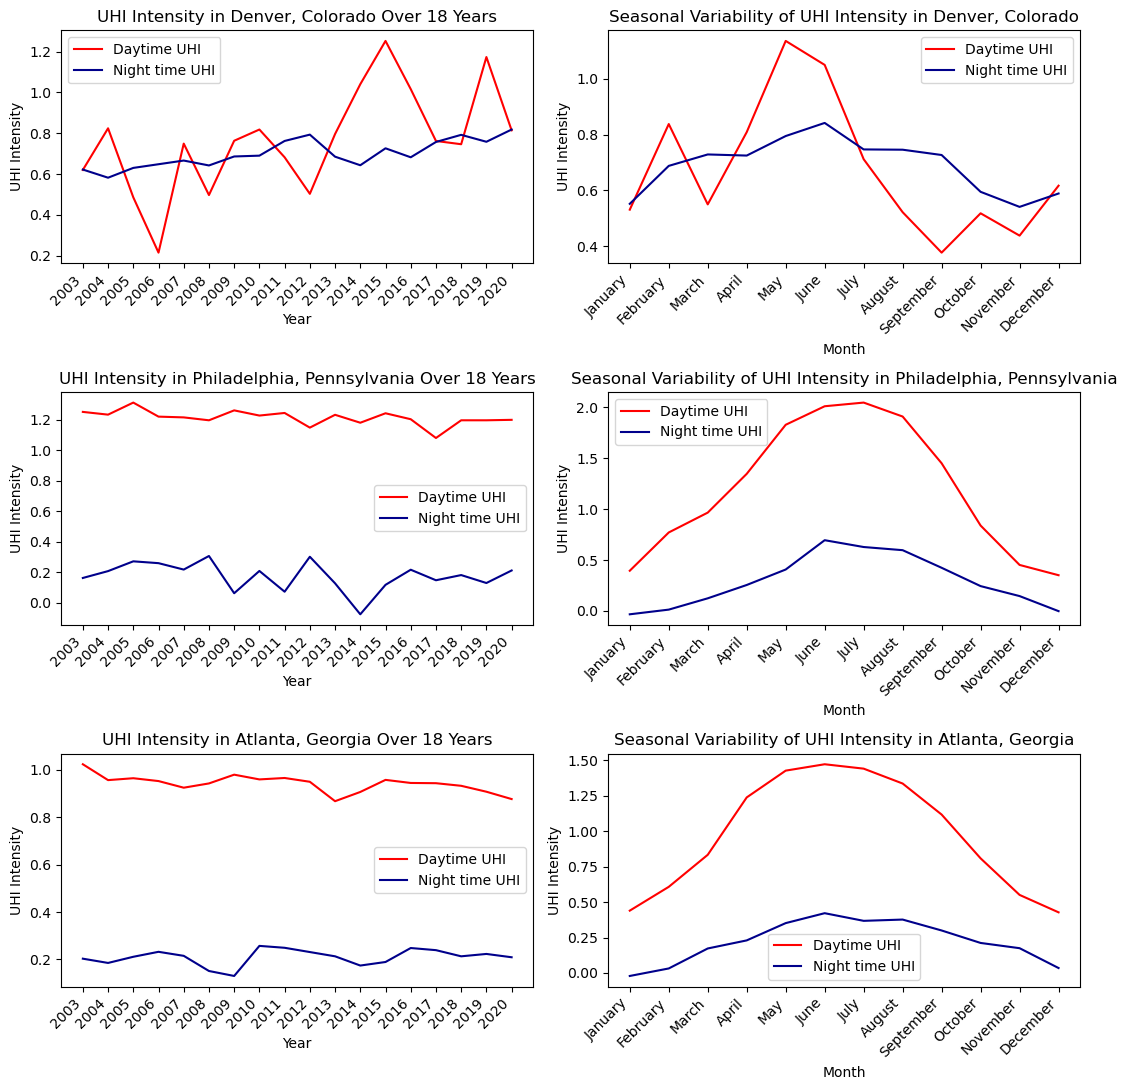

In [335]:
gs=gridspec.GridSpec(nrows=3,ncols=2) 

fig=plt.figure(figsize = (11,11))

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(denveran['system:time_start'],denveran['Daytime'], color = 'red')
ax1.plot(denveran['system:time_start'], denveran['Nighttime'], color = 'darkblue')
plt.xticks(np.arange(2003,2021,1), ['2003', '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'], rotation=45, ha="right")
plt.xlabel('Year')
plt.ylabel('UHI Intensity')
plt.title('UHI Intensity in Denver, Colorado Over 18 Years')
plt.legend(['Daytime UHI', 'Night time UHI'])

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(denverse['system:time_start'],denverse['Daytime'], color = 'red')
ax2.plot(denverse['system:time_start'], denverse['Nighttime'], color = 'darkblue')
plt.xticks(np.arange(0,12,1), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45, ha="right");
plt.xlabel('Month')
plt.ylabel('UHI Intensity')
plt.title('Seasonal Variability of UHI Intensity in Denver, Colorado')
plt.legend(['Daytime UHI', 'Night time UHI'])

ax3 = fig.add_subplot(gs[1,0])
ax3.plot(phillyan['system:time_start'],phillyan['Daytime'], color = 'red')
ax3.plot(phillyan['system:time_start'], phillyan['Nighttime'], color = 'darkblue')
plt.xticks(np.arange(2003,2021,1), ['2003', '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'], rotation=45, ha="right")
plt.xlabel('Year')
plt.ylabel('UHI Intensity')
plt.title('UHI Intensity in Philadelphia, Pennsylvania Over 18 Years')
plt.legend(['Daytime UHI', 'Night time UHI'])

ax4 = fig.add_subplot(gs[1,1])
ax4.plot(phillyse['system:time_start'],phillyse['Daytime'], color = 'red')
ax4.plot(phillyse['system:time_start'], phillyse['Nighttime'], color = 'darkblue')
plt.xticks(np.arange(0,12,1), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45, ha="right");
plt.xlabel('Month')
plt.ylabel('UHI Intensity')
plt.title('Seasonal Variability of UHI Intensity in Philadelphia, Pennsylvania')
plt.legend(['Daytime UHI', 'Night time UHI'])

ax5 = fig.add_subplot(gs[2,0])
ax5.plot(atlantaa['system:time_start'],atlantaa['Daytime'], color = 'red')
ax5.plot(atlantaa['system:time_start'], atlantaa['Nighttime'], color = 'darkblue')
plt.xticks(np.arange(2003,2021,1), ['2003', '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'], rotation=45, ha="right")
plt.xlabel('Year')
plt.ylabel('UHI Intensity')
plt.title('UHI Intensity in Atlanta, Georgia Over 18 Years')
plt.legend(['Daytime UHI', 'Night time UHI'])

ax6 = fig.add_subplot(gs[2,1])
ax6.plot(atlantas['system:time_start'],atlantas['Daytime'], color = 'red')
ax6.plot(atlantas['system:time_start'], atlantas['Nighttime'], color = 'darkblue')
plt.xticks(np.arange(0,12,1), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45, ha="right");
plt.xlabel('Month')
plt.ylabel('UHI Intensity')
plt.title('Seasonal Variability of UHI Intensity in Atlanta, Georgia')
plt.legend(['Daytime UHI', 'Night time UHI'])

plt.tight_layout();

The hump-like shape in the seasonal variability of UHI in Atlanta and Philadelphia is interesting, especially when juxtaposed with Denver's much spiker plots. It's also interesting that Philly and Atlanta both have very removed day vs. night UHI, with spikes and dips in roughly the same places, while Denver's night and day UHIs are much less connected. My instinct is that the mountains play a significant role in that variability in Denver, and (as I will note later, when looking at Boston and Madison), it's interesting that this an East-West divide, at least in this small dataset. 

I also find it very intriguing that Denver's night time UHI has basically held steady for 18 years, while its daytime UHI has fluctuated all over the place - especially when considering that Philly and Atlanta do not demonstrate this behavior at all. 


Also, for fun and curiosity, I got some data from Boston and from Madison (specifically from where I used to live, in Lower Allston, and where I live right now, on the isthmus near Tenney Park). 

Let's load that data in and plot it: 

In [205]:
bostonannual = pd.read_csv('annualboston.csv')
madisonannual = pd.read_csv('avariability_madison.csv')
bostonseasonal = pd.read_csv('svariability_boston.csv')
madisonseasonal = pd.read_csv('svariability_madison.csv')

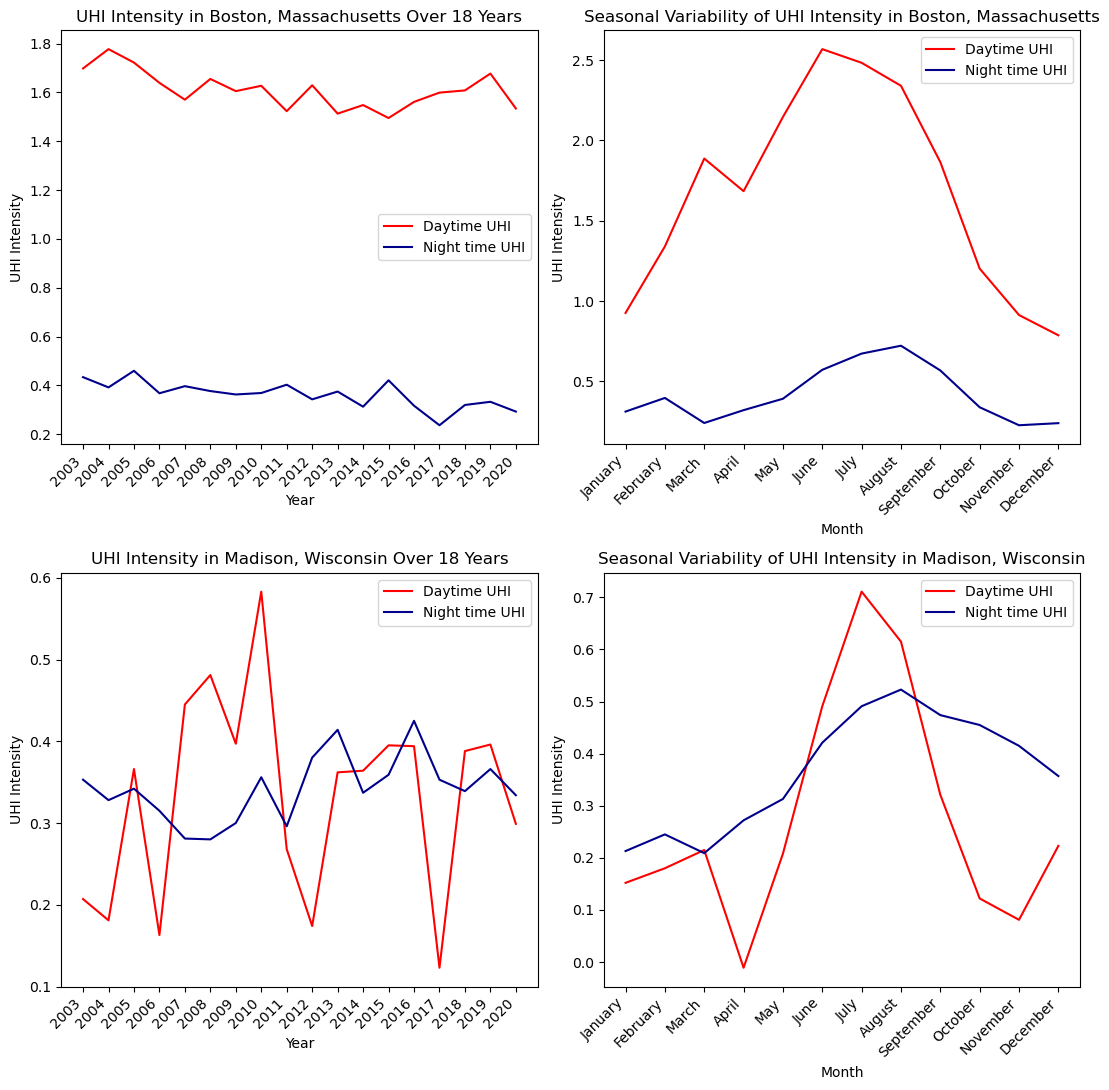

In [336]:
gs=gridspec.GridSpec(nrows=2,ncols=2) 

fig=plt.figure(figsize = (11,11))

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(bostonannual['system:time_start'],bostonannual['Daytime'], color = 'red')
ax1.plot(bostonannual['system:time_start'], bostonannual['Nighttime'], color = 'darkblue')
plt.xticks(np.arange(2003,2021,1), ['2003', '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'], rotation=45, ha="right")
plt.xlabel('Year')
plt.ylabel('UHI Intensity')
plt.title('UHI Intensity in Boston, Massachusetts Over 18 Years')
plt.legend(['Daytime UHI', 'Night time UHI'])

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(bostonseasonal['system:time_start'],bostonseasonal['Daytime'], color = 'red')
ax2.plot(bostonseasonal['system:time_start'], bostonseasonal['Nighttime'], color = 'darkblue')
plt.xticks(np.arange(0,12,1), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45, ha="right");
plt.xlabel('Month')
plt.ylabel('UHI Intensity')
plt.title('Seasonal Variability of UHI Intensity in Boston, Massachusetts')
plt.legend(['Daytime UHI', 'Night time UHI'])

ax3 = fig.add_subplot(gs[1,0])
ax3.plot(madisonannual['system:time_start'],madisonannual['Daytime'], color = 'red')
ax3.plot(madisonannual['system:time_start'], madisonannual['Nighttime'], color = 'darkblue')
plt.xticks(np.arange(2003,2021,1), ['2003', '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'], rotation=45, ha="right")
plt.xlabel('Year')
plt.ylabel('UHI Intensity')
plt.title('UHI Intensity in Madison, Wisconsin Over 18 Years')
plt.legend(['Daytime UHI', 'Night time UHI'])

ax4 = fig.add_subplot(gs[1,1])
ax4.plot(madisonseasonal['system:time_start'],madisonseasonal['Daytime'], color = 'red')
ax4.plot(madisonseasonal['system:time_start'], madisonseasonal['Nighttime'], color = 'darkblue')
plt.xticks(np.arange(0,12,1), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45, ha="right");
plt.xlabel('Month')
plt.ylabel('UHI Intensity')
plt.title('Seasonal Variability of UHI Intensity in Madison, Wisconsin')
plt.legend(['Daytime UHI', 'Night time UHI'])

plt.tight_layout();

So that's neat! There are a LOT of other factors at play here - Boston has about three times the population of Madison, for starters - but it's interesting to see how much different these UHI intensities are. Boston's UHI is significantly higher than Madison's (something I can corroborate from personal experience - it's incredible how much weather in Boston varies in comparison to the rest of Massachusetts, partially because it's coastal but also partially because of how much warmer it is in the city than in the rest of the state, and I so far haven't noticed that being nearly as intense in Madison). 

The night-day difference in Boston vs. Madison is also, literally, night and day - in Madison, the night time UHI is pretty close to the daytime UHI, both seasonally and annually - sometimes even surpassing. In Boston, they don't ever meet. It's a small sample size, so you can't get much from it, but it's interesting that the cities with these large night-day differences are all on the East Coast, while the two with closer values are further inland.